In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from detector.easyocr import Reader
from glob import glob
import torch
import cv2

ckp = torch.load('./craft/exp/custom_data_train/CRAFT_clr_amp_5200.pth')['craft']

detector = Reader(['ko'], recognizer = False, gpu = False,
             model_storage_directory='./detector_ckp',
            user_network_directory='./detector_ckp',
            recog_network='custom')

Using CPU. Note: This module is much faster with a GPU.


In [2]:
imgs = glob('./data/2_txt_format/ch4_test_images/*')
image = cv2.imread(imgs[4])
result = detector.detect(image)

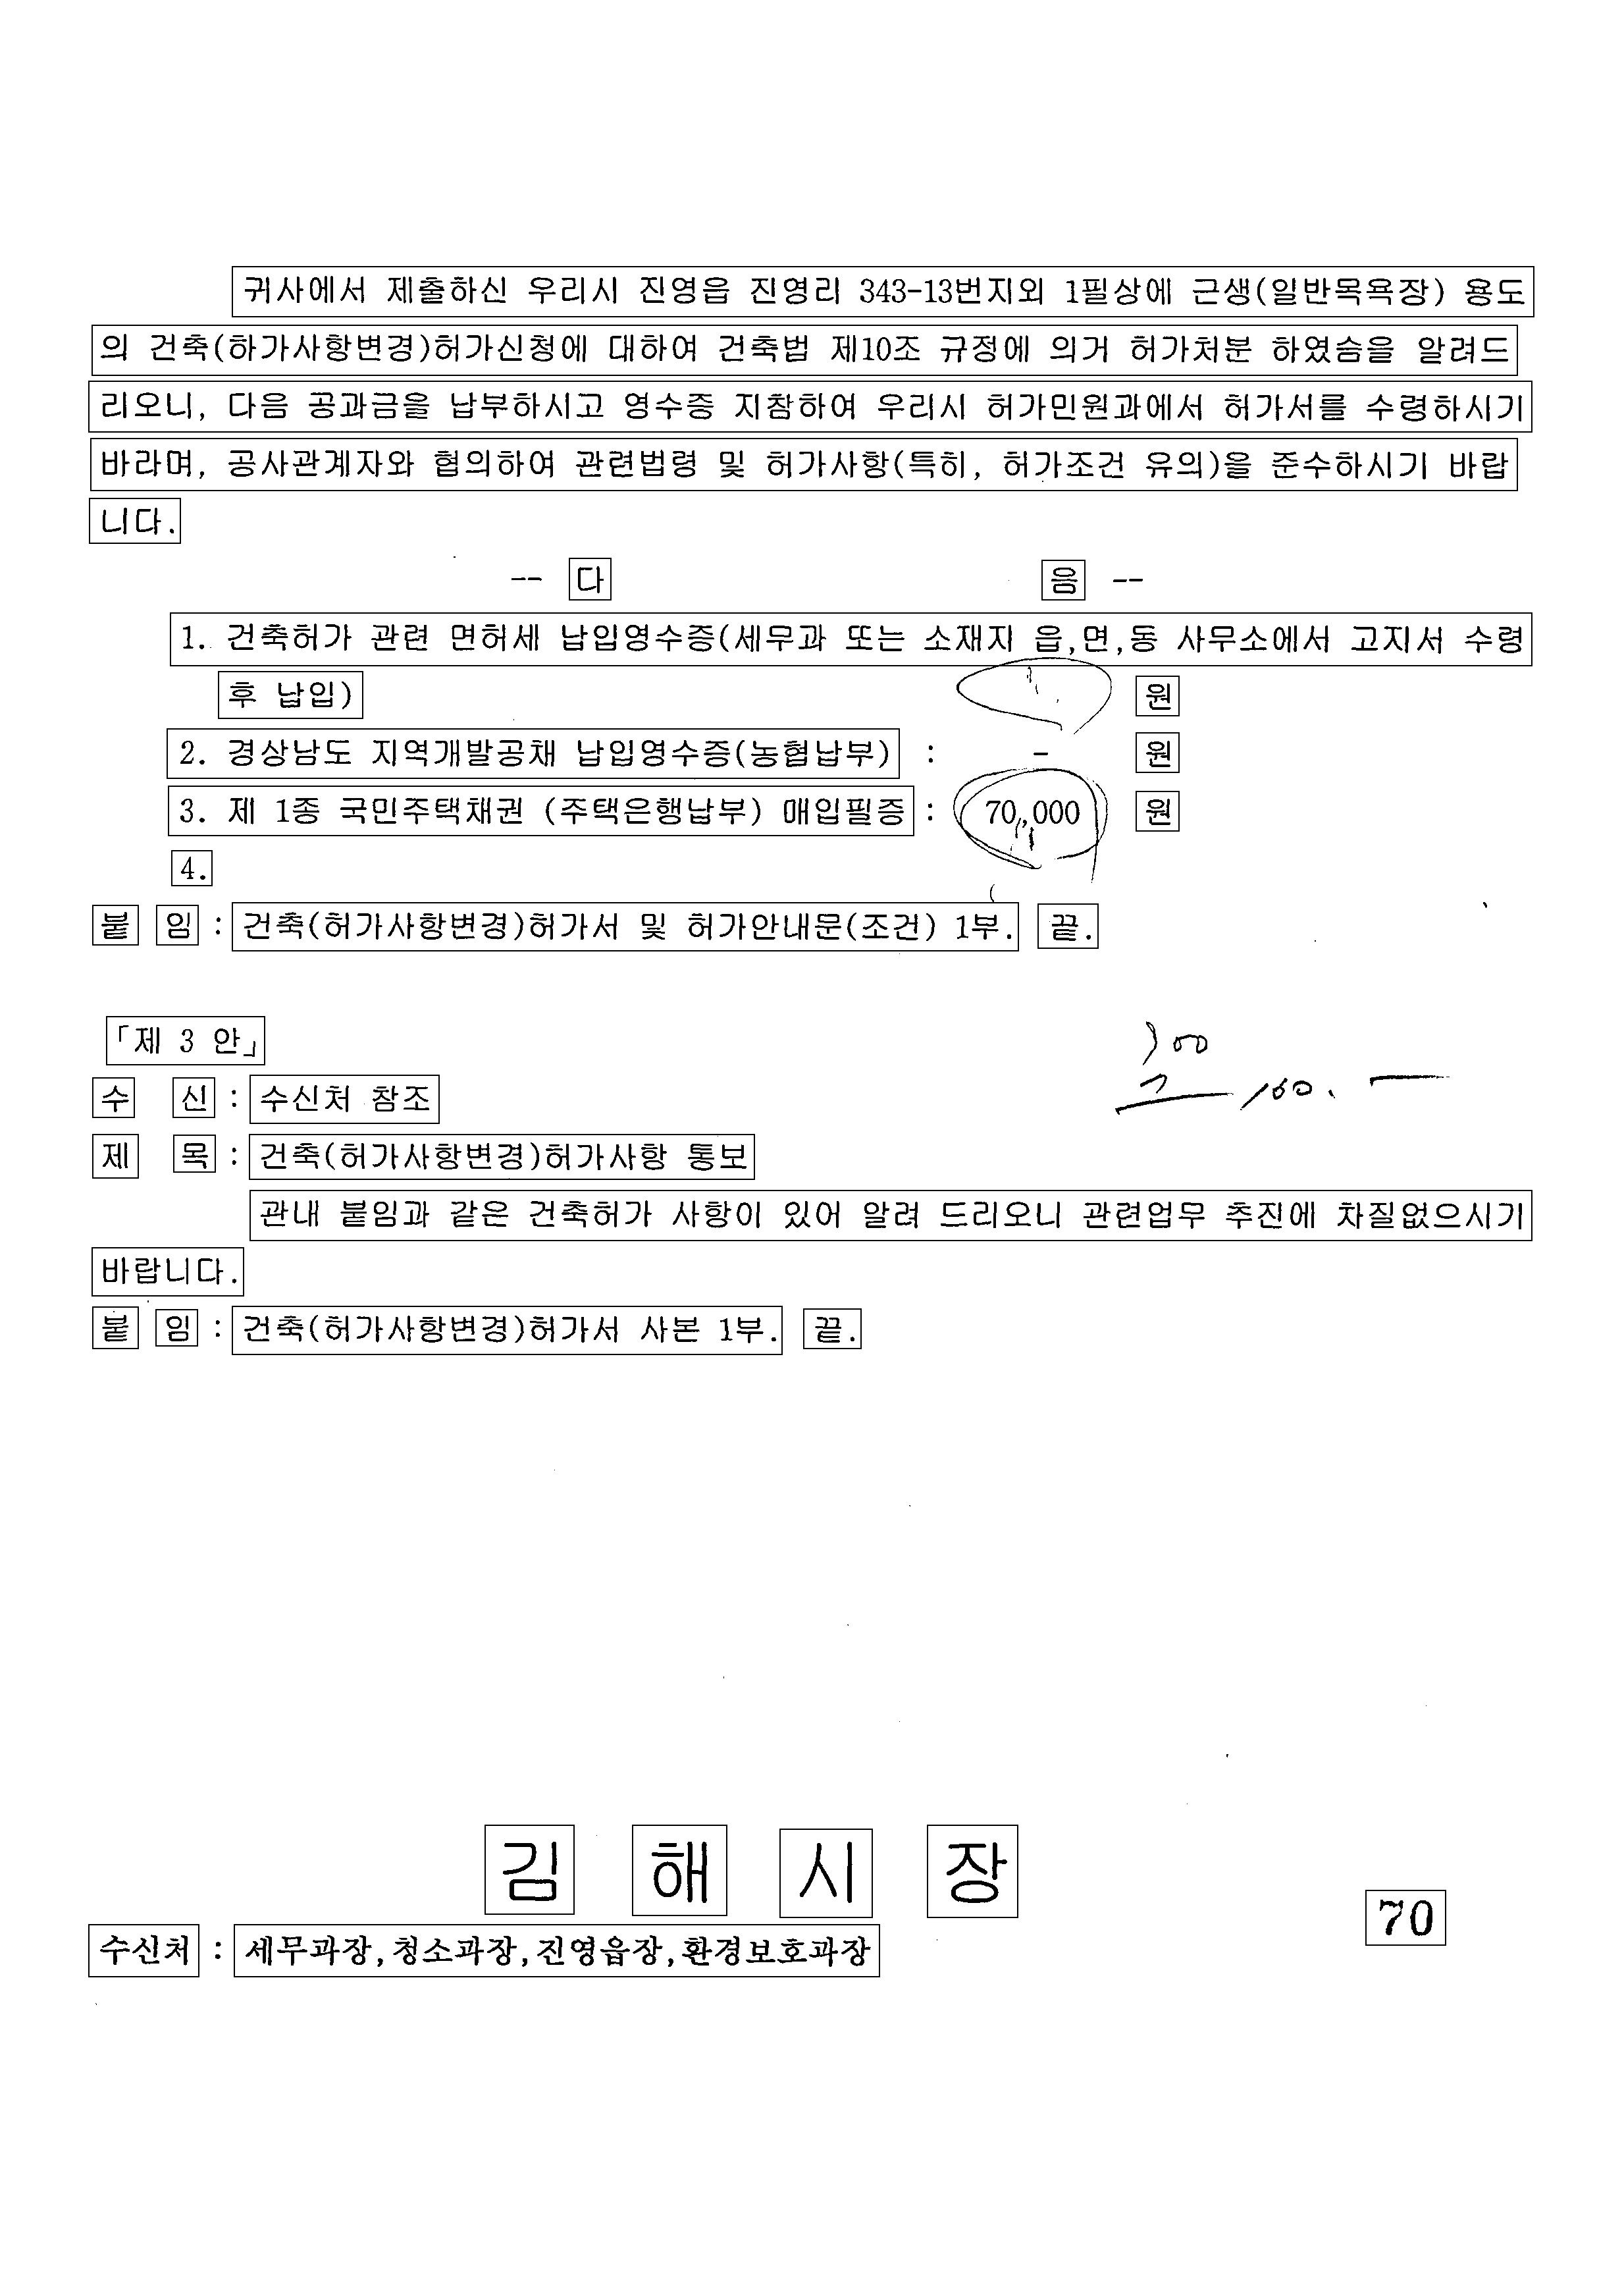

In [4]:
from PIL import Image, ImageDraw, ImageFont

image_bbox = Image.fromarray(image)
draw = ImageDraw.Draw(image_bbox)

color = [0]
for i in result[0][0]:
    draw.rectangle(((i[0], i[2]), (i[1], i[3])), outline=tuple(color), width=2)
#     break
image_bbox

In [35]:
from collections import OrderedDict
from model.craft import CRAFT

def copyStateDict(state_dict):
    if list(state_dict.keys())[0].startswith("module"):
        start_idx = 1
    else:
        start_idx = 0
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = ".".join(k.split(".")[start_idx:])
        new_state_dict[name] = v
    return new_state_dict

def get_detector(trained_model, device='cpu', quantize=True, cudnn_benchmark=False):
    net = CRAFT()

    if device == 'cpu':
        net.load_state_dict(copyStateDict(torch.load(trained_model, map_location=device)['craft']))
        if quantize:
            try:
                torch.quantization.quantize_dynamic(net, dtype=torch.qint8, inplace=True)
            except:
                pass
    else:
        net.load_state_dict(copyStateDict(torch.load(trained_model, map_location=device)['craft']))
        # net.load_state_dict(copyStateDict(torch.load(trained_model, map_location=device)['cuda'])) 
        net = torch.nn.DataParallel(net).to(device)
        cudnn.benchmark = cudnn_benchmark

    net.eval()
    return net

model = get_detector(copyStateDict(torch.load('./craft/exp/custom_data_train/CRAFT_clr_amp_5200.pth')['craft']))

# model = CRAFT(pretrained=False, amp= True)
# model.load_state_dict(ckp)
# model.to('cpu')
# model.eval()
# torch.backends.cudnn.benchmark = True

In [10]:
from glob import glob
import cv2

imgs = glob('./data/2_txt_format/ch4_test_images/*')
image = cv2.imread(imgs[0])

In [7]:
image = torch.FloatTensor(image.transpose(2, 0, 1))
image = torch.unsqueeze(image, 0)
# image = image.cuda(non_blocking=True)

In [41]:

result = model(image)

In [44]:
out1 = result[0][:, :, :, 0]
out2 = result[0][:, :, :, 1]

In [50]:
result[1].shape

torch.Size([1, 32, 1733, 1237])

In [31]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from .easyocr import Reader

# detector_base = Reader(['ko'], recognizer = False, gpu = False)
detector = Reader(['ko'], recognizer = False, gpu = False,
             model_storage_directory='./easyOCR',
            user_network_directory='./easyOCR',
            recog_network='custom')

Using CPU. Note: This module is much faster with a GPU.


In [32]:
image = cv2.imread(imgs[142])
result = detector.detect(image)

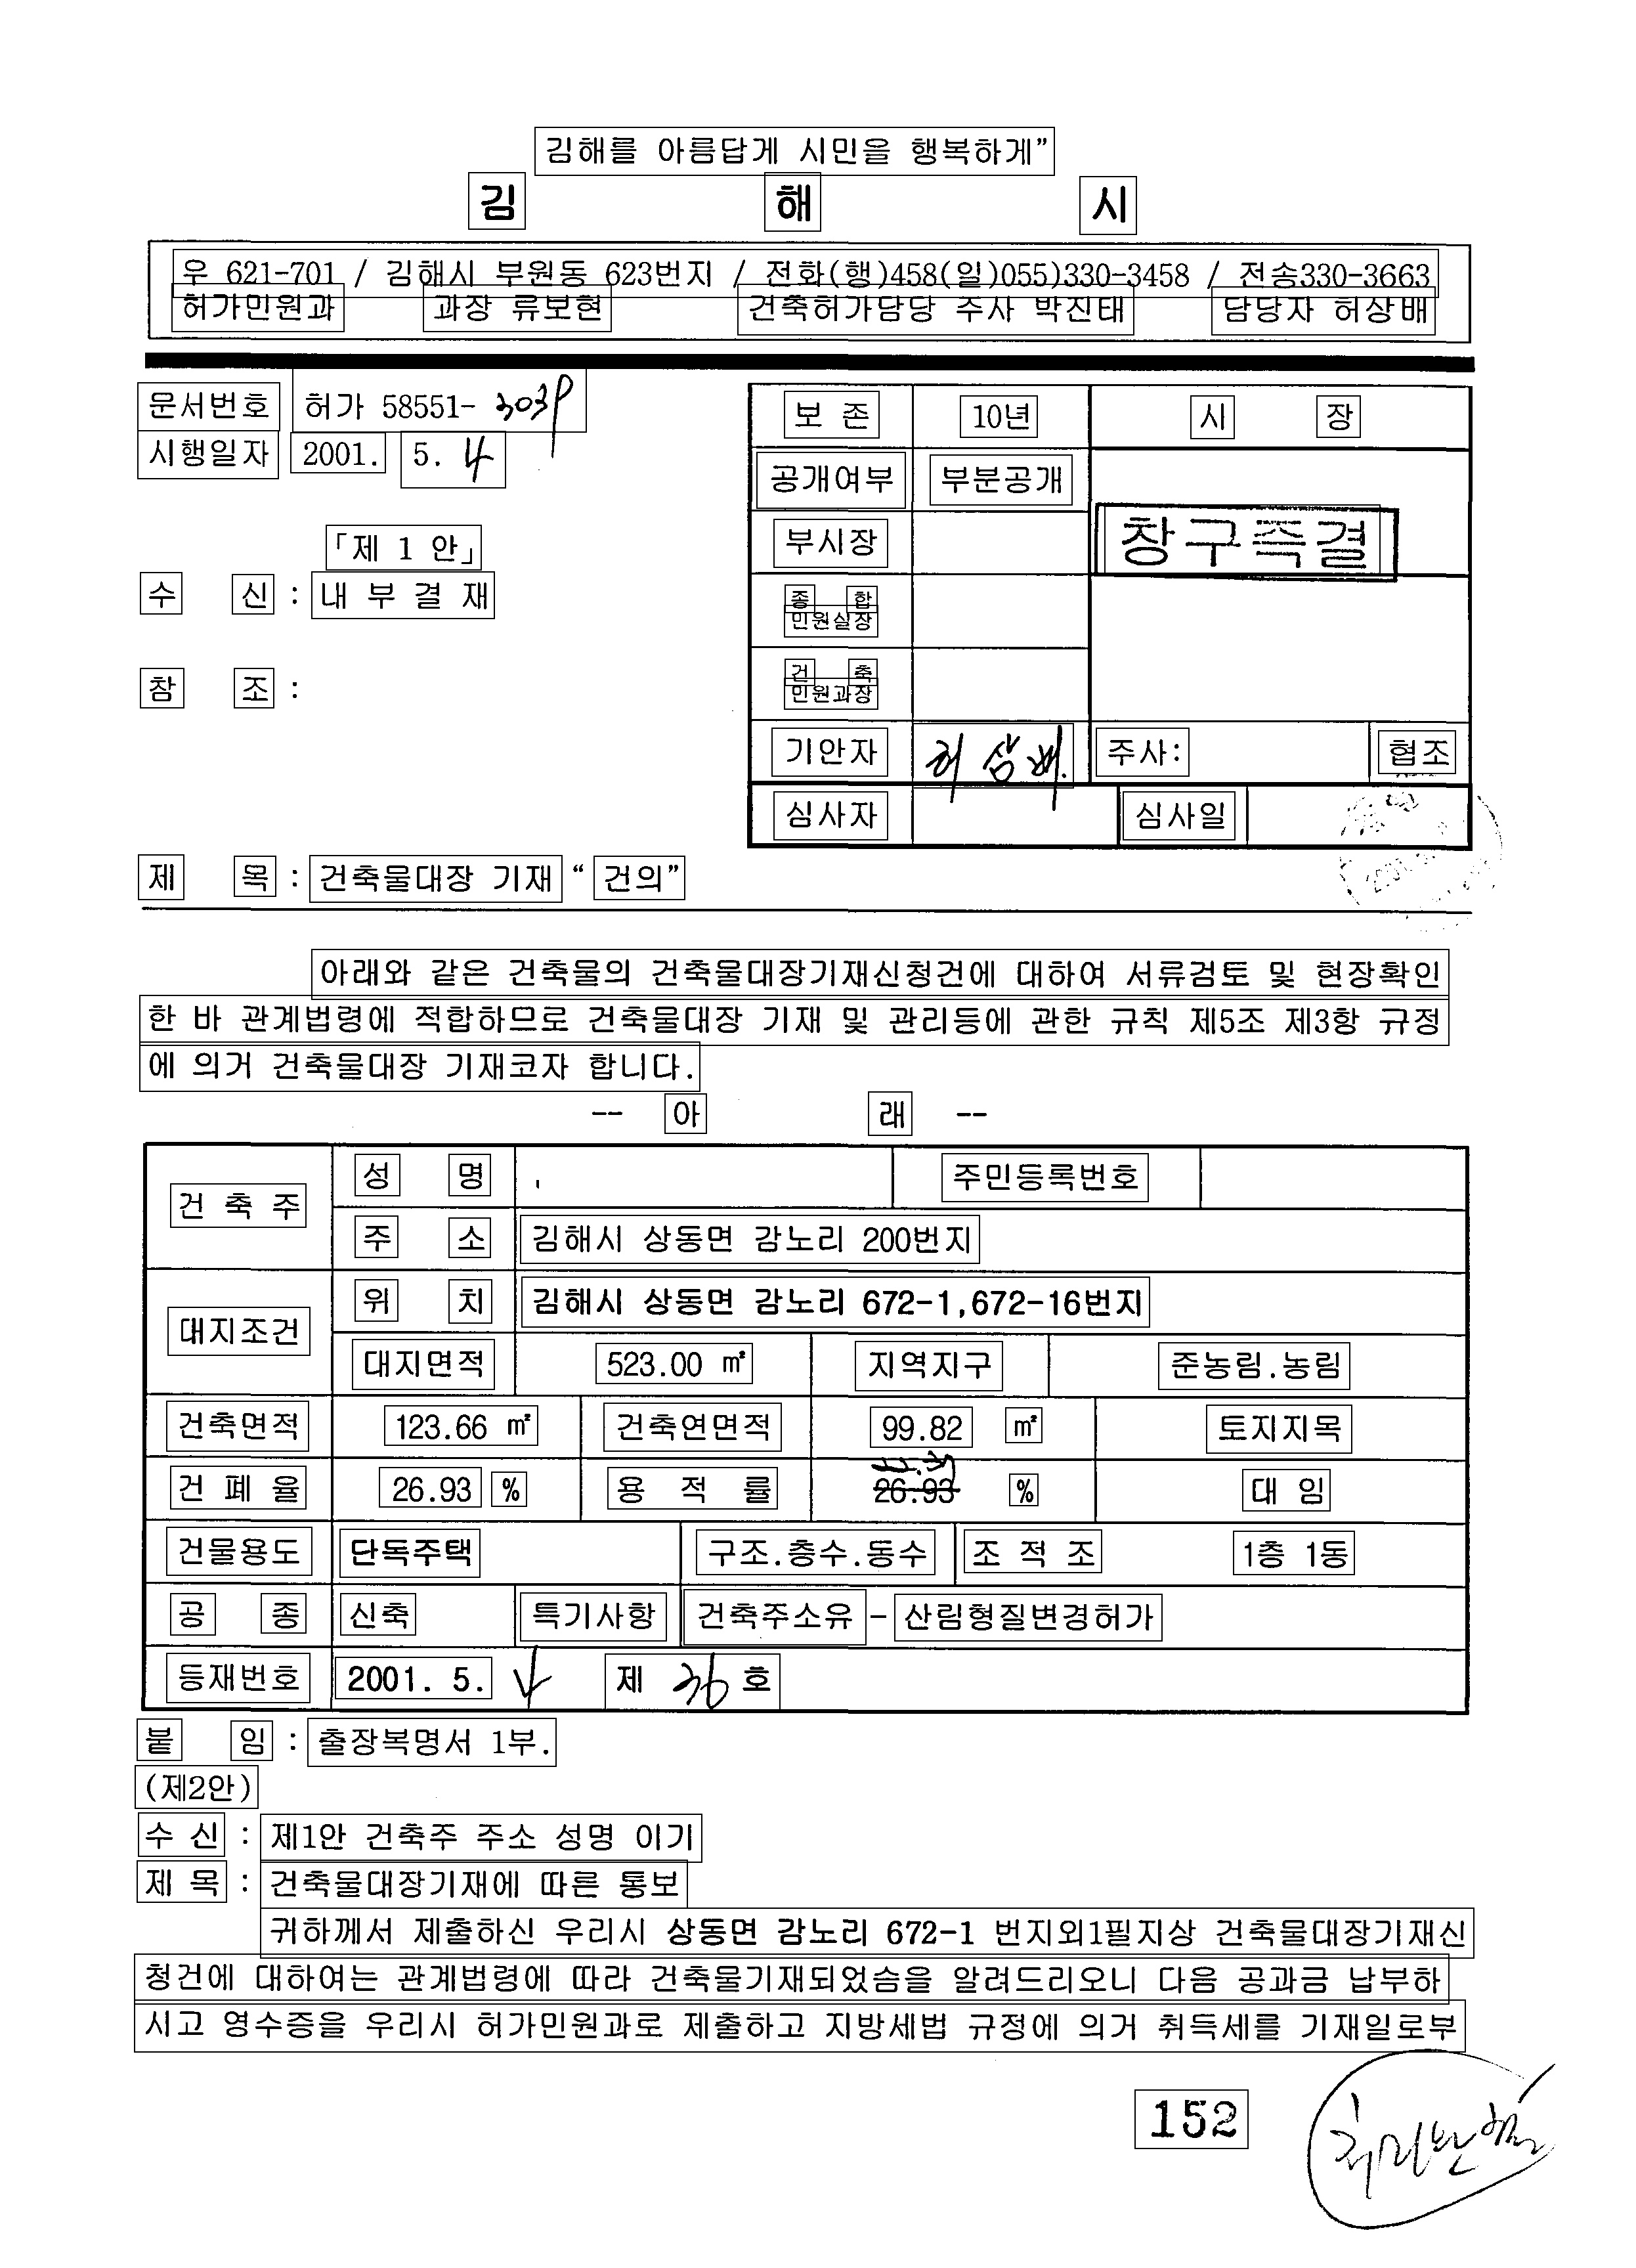

In [33]:
from PIL import Image, ImageDraw, ImageFont

image_bbox = Image.fromarray(image)
draw = ImageDraw.Draw(image_bbox)

color = [0]
for i in result[0][0]:
#     print(i)
    try:
#         x = i[0][0] 
#         y = i[0][1] 
#         w = i[1][0] - i[0][0] 
#         h = i[2][1] - i[1][1]
#         draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)
        draw.rectangle(((i[0], i[2]), (i[1], i[3])), outline=tuple(color), width=2)
#         break
    except:
        pass

image_bbox